<a href="https://colab.research.google.com/github/Danddt/Russian_Opinion_Polls/blob/main/levada_montly_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# November Poll Results 

In [1]:
import os
import pandas as pd
import numpy as np

dfs = []
for file in os.listdir('/content/drive/MyDrive/RUSSdata/Levada/2022-12-02/'):
  name = '/content/drive/MyDrive/RUSSdata/Levada/2022-12-02/'+file
  df_l = pd.read_csv(name)
  df_l['survey_name'] = file
  df_l['date'] = pd.to_datetime(df_l['date'].str.strip(), format='%Y-%m')
  dfs.append(df_l)


**Unemploymnet Index:**
The index is calculated as the difference between the share of answers "in the next 12 months there will be fewer unemployed" and "in the next 12 months there will be more unemployed". The higher the indicator, the less fear of unemployment.
(source: https://www.levada.ru/en/ratings/)

In [2]:
unemployment = dfs[8][['date', 'Unemployment Index']]
index_consumer = dfs[7][['date', 'Consumer Sentimet Index']]
social_sentiment = dfs[6][['date', 'Social Sentiment Index']]

approval_gov = dfs[2][['date', 'Approve']]
approval_president = dfs[0][['date', 'Approve']]

assesment = dfs[3][['date', 'In the right direction']]

In [3]:
filt1 = '2014-12'

In [4]:
## 2022 Invasion of Ukraine
feb_unemployment = unemployment[unemployment['date']>'2022'].set_index('date')
feb_index_consumer = index_consumer[index_consumer['date']>'2022'].set_index('date')
feb_social_sentiment = social_sentiment[social_sentiment['date']>'2022'].set_index('date')

## 2014 Invasion of Ukraine
first_feb_unemployment = unemployment[(unemployment['date']>'2014') & (unemployment['date']<filt1)].set_index('date')
first_feb_index_consumer = index_consumer[(index_consumer['date']>'2014') & (index_consumer['date']<filt1)].set_index('date')
first_feb_social_sentiment = social_sentiment[(social_sentiment['date']>'2014') & (social_sentiment['date']<filt1)].set_index('date')


In [5]:
## 2022 Invasion of Ukraine
pres_feb_on = approval_president[approval_president['date']>'2022'].set_index('date').rename(columns={'Approve': 
                                                                                                      'President Approval'})
gov_feb_on = approval_gov[approval_gov['date']>'2022'].set_index('date').rename(columns={'Approve': 
                                                                                         'Government Approval'})
assesment_feb_on=assesment[assesment['date']>'2022'].set_index('date').rename(columns={'In the right direction': 
                                                                                       'Russia moving In the right direction'})


## 2014 Invasion of Ukraine
first_pres_feb_on = approval_president[(approval_president['date']>'2014') & (approval_president['date']<filt1)].set_index('date').rename(columns={'Approve': 'President Approval'})
first_gov_feb_on = approval_gov[(approval_gov['date']>'2014') & (approval_gov['date']<filt1)].set_index('date').rename(columns={'Approve': 'Government Approval'})
first_assesment_feb_on=assesment[(assesment['date']>'2014') & (assesment['date']<filt1)  ].set_index('date').rename(columns={'In the right direction': 'Russia moving In the right direction'})

In [6]:
listo1 = [first_pres_feb_on,first_gov_feb_on, first_assesment_feb_on, first_feb_unemployment,first_feb_index_consumer,first_feb_social_sentiment]
first_political_asses = pd.concat(listo1, axis =1).reset_index()
first_political_asses.to_csv('/content/drive/MyDrive/movie_russia/November_2022/data_feb_nov_2014.csv', index=False)
display(first_political_asses)

,date,President Approval,Government Approval,Russia moving In the right direction,Unemployment Index,Consumer Sentimet Index,Social Sentiment Index
0,2014-02-01,69.0,47.0,47.0,84.0,80.0,80.0
1,2014-03-01,80.0,58.0,60.0,NaN,82.0,NaN
2,2014-04-01,82.0,56.0,58.0,89.0,84.0,89.0
3,2014-05-01,83.0,60.0,60.0,NaN,89.0,NaN
4,2014-06-01,86.0,60.0,62.0,87.0,87.0,90.0
5,2014-07-01,85.0,60.0,55.0,NaN,83.0,NaN
6,2014-08-01,84.0,62.0,64.0,85.0,85.0,88.0
7,2014-09-01,86.0,66.0,62.0,NaN,78.0,NaN
8,2014-10-01,88.0,64.0,60.0,80.0,78.0,86.0
9,2014-11-01,85.0,59.0,59.0,NaN,78.0,NaN


In [7]:
listo2 = [pres_feb_on,gov_feb_on, assesment_feb_on,feb_unemployment,feb_index_consumer,feb_social_sentiment]
political_asses = pd.concat(listo2, axis =1).reset_index()

political_asses.to_csv('/content/drive/MyDrive/movie_russia/November_2022/data_feb_nov_2022.csv', index=False)

In [8]:
display(political_asses)

,date,President Approval,Government Approval,Russia moving In the right direction,Unemployment Index,Consumer Sentimet Index,Social Sentiment Index
0,2022-02-01,71.0,55.0,52.0,68.0,74.0,NaN
1,2022-03-01,83.0,70.0,69.0,NaN,NaN,90.0
2,2022-04-01,82.0,68.0,66.0,60.0,70.0,NaN
3,2022-05-01,83.0,70.0,68.0,NaN,NaN,94.0
4,2022-06-01,83.0,70.0,68.0,NaN,80.0,NaN
5,2022-07-01,83.0,71.0,68.0,NaN,NaN,96.0
6,2022-08-01,83.0,68.0,67.0,71.0,82.0,NaN
7,2022-09-01,77.0,63.0,60.0,NaN,NaN,82.0
8,2022-10-01,79.0,66.0,64.0,NaN,78.0,NaN
9,2022-11-01,79.0,65.0,61.0,87.0,NaN,86.0


In [9]:
political_asses['President Approval'].max()

83.0

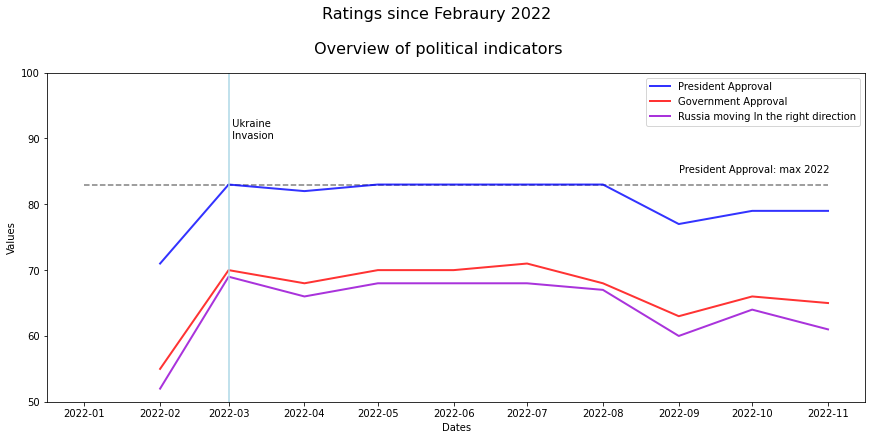

In [10]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)


plt.ylim(50,100, 5)


ax.plot(political_asses.date,political_asses['President Approval'], linewidth=2,alpha=0.8, color='blue' )
ax.plot(political_asses.date,political_asses['Government Approval'], linewidth=2,alpha=0.8, color='red' )
ax.plot(political_asses.date,political_asses['Russia moving In the right direction'], linewidth=2,alpha=0.8, color='darkviolet' )


ax.axvline(pd.Timestamp('2022-03'),color='lightblue',linestyle='solid', alpha=1)
ax.text(x=pd.Timestamp('2022-03'), y=90, s=' Ukraine\n Invasion', color='black')

ax.hlines(y=83, xmin=pd.Timestamp('2022-01-01'), 
          xmax=pd.Timestamp('2022-11-01'),linestyle='dashed', alpha=1, color = 'gray')
ax.text(x=pd.Timestamp('2022-09-01'), y=83, s='President Approval: max 2022\n', color='black')

plt.xlabel('Dates')
plt.ylabel('Values')

ax.legend(['President Approval','Government Approval','Russia moving In the right direction'], loc='upper right')


fig.suptitle('Ratings since Febraury 2022\n\n Overview of political indicators', fontsize=16)

plt.savefig('/content/drive/MyDrive/movie_russia/November_2022/political_indicators_2022.jpg')

In [11]:
first_political_asses['President Approval'].max()

88.0

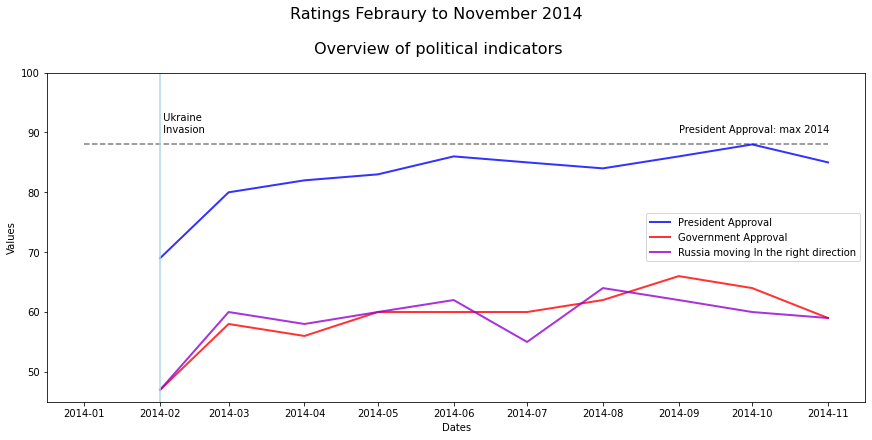

In [12]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)


plt.ylim(45,100, 5)


ax.plot(first_political_asses.date,first_political_asses['President Approval'], linewidth=2,alpha=0.8, color='blue' )
ax.plot(first_political_asses.date,first_political_asses['Government Approval'], linewidth=2,alpha=0.8, color='red' )
ax.plot(first_political_asses.date,first_political_asses['Russia moving In the right direction'], linewidth=2,alpha=0.8, color='darkviolet' )


ax.axvline(pd.Timestamp('2014-02'),color='lightblue',linestyle='solid', alpha=1)
ax.text(x=pd.Timestamp('2014-02'), y=90, s=' Ukraine\n Invasion', color='black')

ax.hlines(y=88, xmin=pd.Timestamp('2014-01-01'), 
          xmax=pd.Timestamp('2014-11-01'),linestyle='dashed', alpha=1, color = 'gray')
ax.text(x=pd.Timestamp('2014-09-01'), y=88, s='President Approval: max 2014\n', color='black')

plt.xlabel('Dates')
plt.ylabel('Values')

ax.legend(['President Approval','Government Approval','Russia moving In the right direction'], loc='center right')


fig.suptitle('Ratings Febraury to November 2014\n\n Overview of political indicators', fontsize=16)

plt.savefig('/content/drive/MyDrive/movie_russia/November_2022/political_indicators_2014.jpg')

In [13]:
date_ind_one=first_political_asses.reset_index()
date_ind_two = political_asses.reset_index()


<ipython-input-14-ebd1d937260f>:21: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l),textcoords="offset points",
<ipython-input-14-ebd1d937260f>:25: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l), textcoords="offset points",


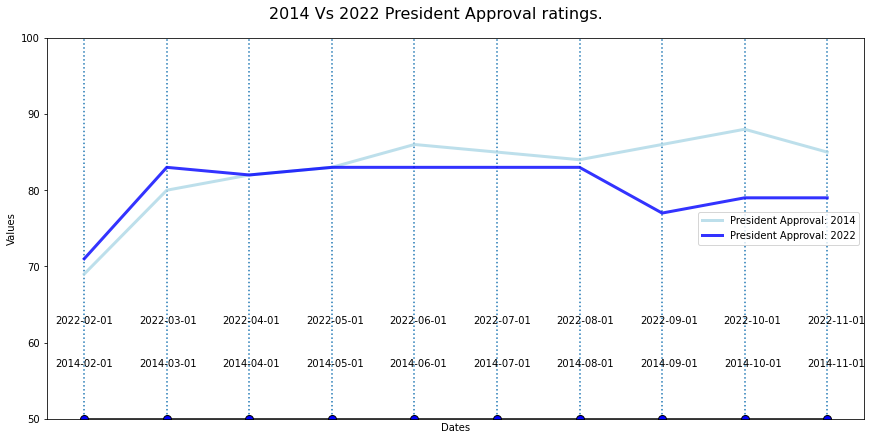

In [14]:
# Combined
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

plt.ylim(50,100, 5)

ax.plot(date_ind_one['index'],first_political_asses['President Approval'],linewidth=3,alpha=0.8, color='lightblue' )
ax.plot(date_ind_one['index'],political_asses['President Approval'],linewidth=3,alpha=0.8, color='blue' )

levels = [50]*10
levelo = [55]*10

ax.vlines(date_ind_one['index'], 0, 100, color="tab:blue", linestyle = 'dotted')
ax.plot(date_ind_one['index'], np.ones_like(date_ind_one['index'])*50, "-o",
        color="k", markerfacecolor="blue", markersize=8)  # Baseline and markers on it.

plt.xticks([])

for d, l,r in zip(date_ind_one['index'],levels ,date_ind_one['date'].astype(str)):
      ax.annotate(r, xy=(d, l),textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
for d, l,r in zip(date_ind_one['index'],levelo ,date_ind_two['date'].astype(str)):
      ax.annotate(r, xy=(d, l), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
      
plt.xlabel('Dates')
plt.ylabel('Values')

ax.legend(['President Approval: 2014','President Approval: 2022', ], loc='center right')

fig.suptitle('2014 Vs 2022 President Approval ratings.', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/November_2022/presidentVS2014_2022.jpg')

<ipython-input-15-9f9b8fe0b324>:21: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l),textcoords="offset points",
<ipython-input-15-9f9b8fe0b324>:25: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l), textcoords="offset points",


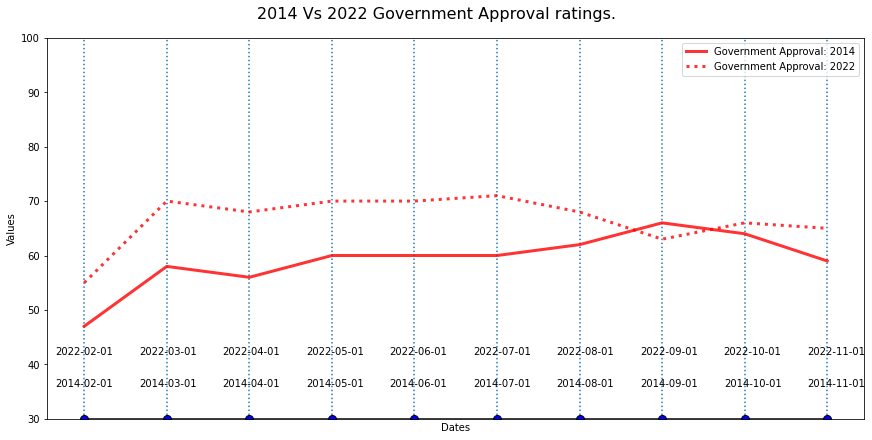

In [15]:
# Combined
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

plt.ylim(30,100, 5)

ax.plot(date_ind_one['index'],first_political_asses['Government Approval'],linewidth=3,alpha=0.8, color='red' )
ax.plot(date_ind_one['index'],political_asses['Government Approval'],linewidth=3,alpha=0.8, linestyle = 'dotted', color='red' )

levels = [30]*10
levelo = [35]*10

ax.vlines(date_ind_one['index'], 0, 100, color="tab:blue", linestyle = 'dotted')
ax.plot(date_ind_one['index'], np.ones_like(date_ind_one['index'])*30, "-o",
        color="k", markerfacecolor="blue", markersize=8)  # Baseline and markers on it.

plt.xticks([])

for d, l,r in zip(date_ind_one['index'],levels ,date_ind_one['date'].astype(str)):
      ax.annotate(r, xy=(d, l),textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
for d, l,r in zip(date_ind_one['index'],levelo ,date_ind_two['date'].astype(str)):
      ax.annotate(r, xy=(d, l), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
      
plt.xlabel('Dates')
plt.ylabel('Values')

ax.legend(['Government Approval: 2014','Government Approval: 2022', ], loc='upper right')

fig.suptitle('2014 Vs 2022 Government Approval ratings.', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/November_2022/governmentVS2014_2022.jpg')

In [16]:
adjusted_graf_22 = political_asses[['date','Unemployment Index','Consumer Sentimet Index','Social Sentiment Index']].dropna(how='all').bfill()

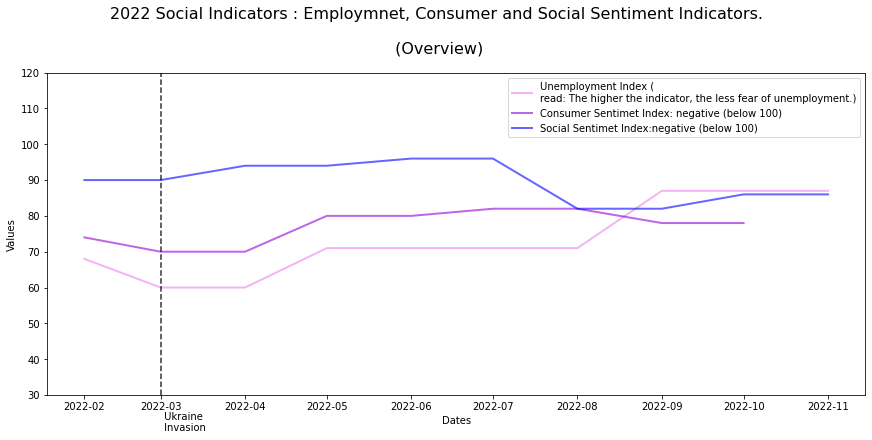

In [17]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax  = plt.subplots(figsize=(12, 6), constrained_layout=True,)

plt.ylim(30,120, 5)

ax.plot(adjusted_graf_22.date, adjusted_graf_22['Unemployment Index'],linewidth=2,alpha=0.6, color='violet' )
ax.plot(adjusted_graf_22.date, adjusted_graf_22['Consumer Sentimet Index'], linewidth=2,alpha=0.6, color='darkviolet' )
ax.plot(adjusted_graf_22.date, adjusted_graf_22['Social Sentiment Index'], linewidth=2,alpha=0.6, color='blue')

ax.axvline(pd.Timestamp('2022-03'),color='black',linestyle='dashed', alpha=0.8)
ax.text(x=pd.Timestamp('2022-03'), y=20, s=' Ukraine\n Invasion', color='black')

plt.xlabel('Dates')
plt.ylabel('Values')

plt.legend(['Unemployment Index (\nread: The higher the indicator, the less fear of unemployment.)', 'Consumer Sentimet Index: negative (below 100)','Social Sentimet Index:negative (below 100)'  ]) #,loc=1, bbox_to_anchor=(0.9,3))

fig.suptitle('2022 Social Indicators : Employmnet, Consumer and Social Sentiment Indicators.\n\n (Overview)', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/November_2022/social_indicators_2022.jpg')

In [18]:

adjusted_graf_14 = first_political_asses[['date','Unemployment Index','Consumer Sentimet Index','Social Sentiment Index']].dropna(how='all').bfill()

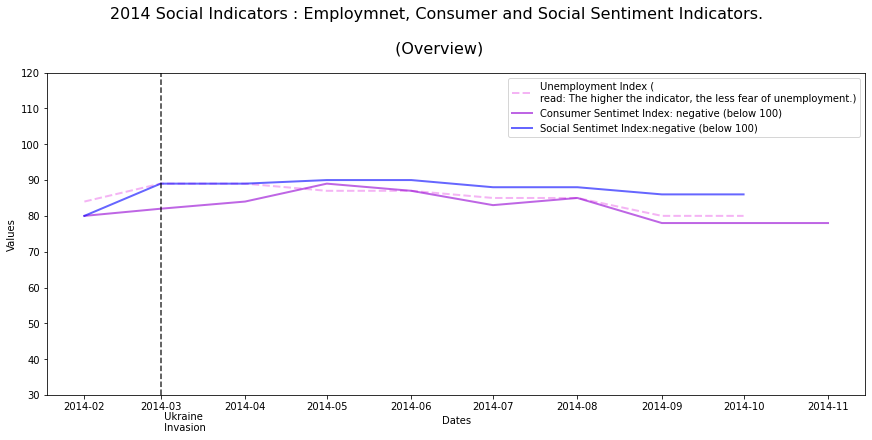

In [19]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax  = plt.subplots(figsize=(12, 6), constrained_layout=True,)

plt.ylim(30,120, 5)

ax.plot(adjusted_graf_14.date, adjusted_graf_14['Unemployment Index'],linestyle = 'dashed', linewidth=2,alpha=0.6, color='violet' )
ax.plot(adjusted_graf_14.date, adjusted_graf_14['Consumer Sentimet Index'], linewidth=2,alpha=0.6, color='darkviolet' )
ax.plot(adjusted_graf_14.date, adjusted_graf_14['Social Sentiment Index'], linewidth=2,alpha=0.6, color='blue')

ax.axvline(pd.Timestamp('2014-03'),color='black',linestyle='dashed', alpha=0.8)
ax.text(x=pd.Timestamp('2014-03'), y=20, s=' Ukraine\n Invasion', color='black')

plt.xlabel('Dates')
plt.ylabel('Values')

plt.legend(['Unemployment Index (\nread: The higher the indicator, the less fear of unemployment.)', 'Consumer Sentimet Index: negative (below 100)','Social Sentimet Index:negative (below 100)'  ]) #,loc=1, bbox_to_anchor=(0.9,3))

fig.suptitle('2014 Social Indicators : Employmnet, Consumer and Social Sentiment Indicators.\n\n (Overview)', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/November_2022/socail_indicators_2014.jpg')

In [20]:
date_ind_one=first_political_asses.reset_index()
date_ind_two = political_asses.reset_index()

In [21]:
date_ind_14 = adjusted_graf_14.reset_index()

<ipython-input-22-9744391099fa>:23: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l),textcoords="offset points",
<ipython-input-22-9744391099fa>:27: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l), textcoords="offset points",


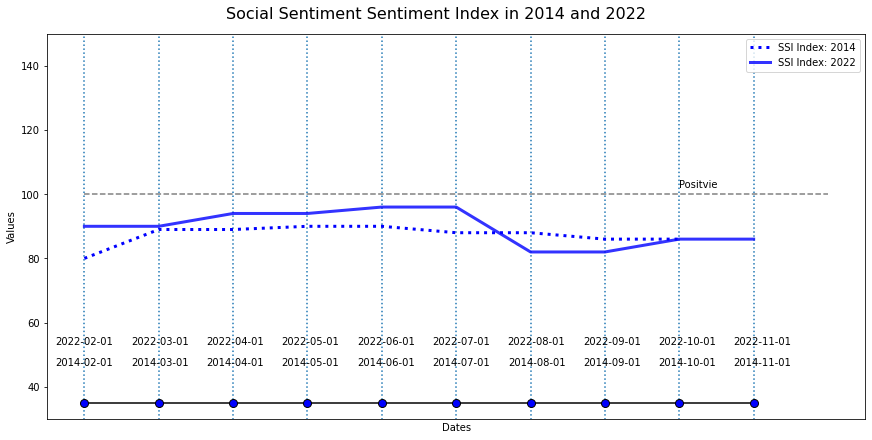

In [22]:
# Combined
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

plt.ylim(30,150, 5)

ax.plot(date_ind_14['index'],adjusted_graf_14['Social Sentiment Index'],linewidth=3,linestyle='dotted', color='blue' )
ax.plot(date_ind_14['index'],adjusted_graf_22['Social Sentiment Index'],linewidth=3,alpha=0.8, color='blue' )


levels = [35]*10
levelo = [40]*10

ax.vlines(date_ind_one['index'], 0, 150, color="tab:blue", linestyle = 'dotted')
ax.plot(date_ind_one['index'], np.ones_like(date_ind_one['index'])*35, "-o",
        color="k", markerfacecolor="blue", markersize=8)  # Baseline and markers on it.

plt.xticks([])

for d, l,r in zip(date_ind_one['index'],levels ,date_ind_one['date'].astype(str)):
      ax.annotate(r, xy=(d, l),textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
for d, l,r in zip(date_ind_one['index'],levelo ,date_ind_two['date'].astype(str)):
      ax.annotate(r, xy=(d, l), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
      
ax.hlines(y=100, xmin=0, 
          xmax=10,linestyle='dashed', alpha=1, color = 'gray')
ax.text(x=8, y=102, s='Positvie', color='black')
      
plt.xlabel('Dates')
plt.ylabel('Values')

ax.legend(['SSI Index: 2014','SSI Index: 2022'], loc='upper right')

fig.suptitle('Social Sentiment Sentiment Index in 2014 and 2022', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/November_2022/SSI_VS2014_2022.jpg')

<ipython-input-23-1367a5838e86>:23: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l),textcoords="offset points",
<ipython-input-23-1367a5838e86>:27: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l), textcoords="offset points",


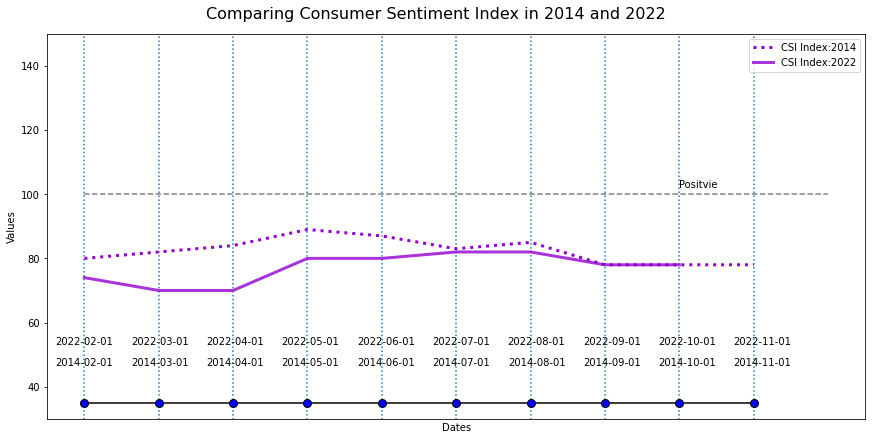

In [23]:
# Combined
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

plt.ylim(30,150, 5)


ax.plot(date_ind_14['index'],adjusted_graf_14['Consumer Sentimet Index'],linewidth=3,linestyle='dotted', color='darkviolet' )
ax.plot(date_ind_14['index'],adjusted_graf_22['Consumer Sentimet Index'],linewidth=3,alpha=0.8, color='darkviolet' )

levels = [35]*10
levelo = [40]*10

ax.vlines(date_ind_one['index'], 0, 150, color="tab:blue", linestyle = 'dotted')
ax.plot(date_ind_one['index'], np.ones_like(date_ind_one['index'])*35, "-o",
        color="k", markerfacecolor="blue", markersize=8)  # Baseline and markers on it.

plt.xticks([])

for d, l,r in zip(date_ind_one['index'],levels ,date_ind_one['date'].astype(str)):
      ax.annotate(r, xy=(d, l),textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
for d, l,r in zip(date_ind_one['index'],levelo ,date_ind_two['date'].astype(str)):
      ax.annotate(r, xy=(d, l), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
      
ax.hlines(y=100, xmin=0, 
          xmax=10,linestyle='dashed', alpha=1, color = 'gray')
ax.text(x=8, y=102, s='Positvie', color='black')
      
plt.xlabel('Dates')
plt.ylabel('Values')

ax.legend(['CSI Index:2014','CSI Index:2022'  ], loc='upper right')
fig.suptitle('Comparing Consumer Sentiment Index in 2014 and 2022', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/November_2022/CSI_VS2014_2022.jpg')

<ipython-input-24-fdd0be263cb5>:22: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l),textcoords="offset points",
<ipython-input-24-fdd0be263cb5>:26: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax.annotate(r, xy=(d, l), textcoords="offset points",


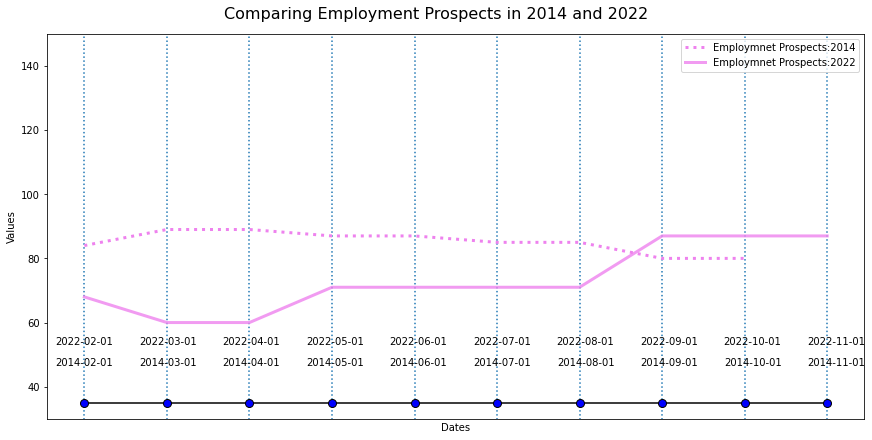

In [24]:
# Combined
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

plt.ylim(30,150, 5)

ax.plot(date_ind_14['index'],adjusted_graf_14['Unemployment Index'],linewidth=3,linestyle='dotted', color='violet' )
ax.plot(date_ind_14['index'],adjusted_graf_22['Unemployment Index'],linewidth=3,alpha=0.8, color='violet' )

levels = [35]*10
levelo = [40]*10

ax.vlines(date_ind_one['index'], 0, 150, color="tab:blue", linestyle = 'dotted')
ax.plot(date_ind_one['index'], np.ones_like(date_ind_one['index'])*35, "-o",
        color="k", markerfacecolor="blue", markersize=8)  # Baseline and markers on it.

plt.xticks([])

for d, l,r in zip(date_ind_one['index'],levels ,date_ind_one['date'].astype(str)):
      ax.annotate(r, xy=(d, l),textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
for d, l,r in zip(date_ind_one['index'],levelo ,date_ind_two['date'].astype(str)):
      ax.annotate(r, xy=(d, l), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
      
      
plt.xlabel('Dates')
plt.ylabel('Values')

ax.legend(['Employmnet Prospects:2014','Employmnet Prospects:2022'  ], loc='upper right')
fig.suptitle('Comparing Employment Prospects in 2014 and 2022', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/November_2022/employVS2014_2022.jpg')

In [25]:
## Inflation expected to clock 10.65 inflation rate for the year

link_ru = 'https://www.statbureau.org/ru/russia/inflation-tables'

tables_ru = pd.read_html(link_ru)



In [26]:
data_ru = tables_ru[1]
year = data_ru['Год']
data_val = data_ru.iloc[:, 1:]/100
#data_val.insert(0, 'Year', year, True)

russ = (data_val.iloc[:1, :])

russ.insert(0, 'country_name','Russia')

russ.columns = ['country_name', '2022-01', '2022-02',
       '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
       '2022-09', '2022-10','2022-11','2022-12', 'Total']
russ

,country_name,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,Total
0,Russia,8.74,9.16,16.7,17.83,17.11,15.9,15.09,14.3,13.67,12.63,NaN,NaN,10.65


In [27]:
ru_monthly_inf = russ.iloc[:, 1:-3].T.reset_index()
ru_monthly_inf.columns= ['date', 'Inflation rate']
ru_monthly_inf['date'] = pd.to_datetime(ru_monthly_inf['date'].str.strip(), format='%Y-%m')
ru_monthly_inf.to_csv('/content/drive/MyDrive/movie_russia/data_inflation.csv', index=False)
display(ru_monthly_inf)

,date,Inflation rate
0,2022-01-01,8.74
1,2022-02-01,9.16
2,2022-03-01,16.70
3,2022-04-01,17.83
4,2022-05-01,17.11
5,2022-06-01,15.90
6,2022-07-01,15.09
7,2022-08-01,14.30
8,2022-09-01,13.67
9,2022-10-01,12.63


In [30]:
ru_bank  = 'https://www.cbr.ru/about_br/publ/ondkp/on_2023_2025/'
bank_table = pd.read_html(ru_bank)

In [31]:
bank_table

[                                                   0           1  \
 0                                                NaN  2021(факт)   
 1                            Инфляция в целом за год          84   
 2                         Валовой внутренний продукт          47   
 3   — в %, IV квартал к IV кварталу предыдущего года          50   
 4       Ключевая ставка, % годовых, в среднем за год          57   
 5  Требования банковской системы к экономике в ру...         139   
 6                                   ● к организациям         107   
 7                        ● к населению, в том числе:         220   
 8                       — ипотечные жилищные кредиты         267   
 
                  2                3          4          5  
 0             2022             2023       2024       2025  
 1      12,0 — 13,0        5,0 — 7,0         40         40  
 2  (-3,5) — (-3,0)  (-4,0) — (-1,0)  1,5 — 2,5  1,5 — 2,5  
 3  (-7,8) — (-6,4)        0,0 — 1,5  0,5 — 1,5  1,5 — 2,5  
 4 

In [32]:
column_names = ['description RU', '2021 (fact)',	'2022',	'2023',	'2024',	'2025', 'description EN']

index_names = ['Inflation for the whole year',	
'Gross domestic product',	
'— in %, IV quarter to IV quarter of the previous year',	
'Key rate, % per annum, annual average', 
'Requirements of the banking system to the economy in rubles and foreign currency, including:',
'● to organizations',	
'● to the population, including:',	
'- home mortgage loans',]

In [33]:
central_bank_table = bank_table[0][1:]
central_bank_table['description EN']=index_names
central_bank_table.columns = column_names
central_bank_table['2021 (fact)']= central_bank_table['2021 (fact)'].astype('float')/10

<ipython-input-33-49935b9366b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_bank_table['description EN']=index_names
<ipython-input-33-49935b9366b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_bank_table['2021 (fact)']= central_bank_table['2021 (fact)'].astype('float')/10


In [34]:

display(central_bank_table)

,description RU,2021 (fact),2022,2023,2024,2025,description EN
1,Инфляция в целом за год,8.4,"12,0 — 13,0","5,0 — 7,0",40,40,Inflation for the whole year
2,Валовой внутренний продукт,4.7,"(-3,5) — (-3,0)","(-4,0) — (-1,0)","1,5 — 2,5","1,5 — 2,5",Gross domestic product
3,"— в %, IV квартал к IV кварталу предыдущего года",5.0,"(-7,8) — (-6,4)","0,0 — 1,5","0,5 — 1,5","1,5 — 2,5","— in %, IV quarter to IV quarter of the previo..."
4,"Ключевая ставка, % годовых, в среднем за год",5.7,106,"6,5 — 8,5","6,0 — 7,0","5,0 — 6,0","Key rate, % per annum, annual average"
5,Требования банковской системы к экономике в ру...,13.9,9 — 12,8 — 13,9 — 14,8 — 13,Requirements of the banking system to the econ...
6,● к организациям,10.7,10 — 13,7 — 12,8 — 13,8 — 13,● to organizations
7,"● к населению, в том числе:",22.0,7 — 10,9 — 14,9 — 14,8 — 13,"● to the population, including:"
8,— ипотечные жилищные кредиты,26.7,14 — 17,10 — 15,10 — 15,10 — 15,- home mortgage loans


In [35]:
central_bank_table[['2022 expected lower', '2022 expected upper']]=  central_bank_table['2022'].str.replace(',','.').str.replace('\(', '').str.replace('\)', '').str.split('—', expand=True)
central_bank_table['2022 expected lower'] = central_bank_table['2022 expected lower'].astype('float').apply(lambda x: x/10 if x > 100 else x)

<ipython-input-35-f44585e9ed60>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  central_bank_table[['2022 expected lower', '2022 expected upper']]=  central_bank_table['2022'].str.replace(',','.').str.replace('\(', '').str.replace('\)', '').str.split('—', expand=True)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-35-f44585e9ed60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [36]:

ru_central_bank_clean = central_bank_table[['description EN', '2021 (fact)', '2022 expected lower', '2022 expected upper']]

In [37]:
ru_central_bank_clean.to_csv('/content/drive/MyDrive/movie_russia/russian_central_bank.csv', index=False)
display(ru_central_bank_clean)

,description EN,2021 (fact),2022 expected lower,2022 expected upper
1,Inflation for the whole year,8.4,12.0,13.0
2,Gross domestic product,4.7,-3.5,-3.0
3,"— in %, IV quarter to IV quarter of the previo...",5.0,-7.8,-6.4
4,"Key rate, % per annum, annual average",5.7,10.6,None
5,Requirements of the banking system to the econ...,13.9,9.0,12
6,● to organizations,10.7,10.0,13
7,"● to the population, including:",22.0,7.0,10
8,- home mortgage loans,26.7,14.0,17


In [38]:
ru_central_bank_clean.iloc[:, 1:] =ru_central_bank_clean.iloc[:, 1:].astype('float')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [39]:
ru_infl_val = ru_central_bank_clean.loc[1].tolist()[1:]

In [40]:
ru_average = (ru_infl_val[1]+ ru_infl_val[2])/2

In [41]:
# EU zone forecasts

eu_sample_countries = ['']


In [42]:
import requests
from bs4 import BeautifulSoup

URL = "https://economy-finance.ec.europa.eu/economic-forecast-and-surveys/economic-forecasts/autumn-2022-economic-forecast-eu-economy-turning-point_en"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")



In [43]:
states_eu = soup.find_all("div", class_="ecl-list-illustration__title")

eu_st_list = []
for state in states_eu:
    eu_st_list.append(state.get_text(strip=True))

eu_st_list[:3]

['Austria', 'Belgium', 'Bulgaria']

In [44]:
forecast_eu = []
for item in eu_st_list:
  temp_url = 'https://economy-finance.ec.europa.eu/economic-surveillance-eu-economies/'+item+'/economic-forecast-'+item+'_en'
  temp_df = pd.read_html(temp_url)
  temp_df = temp_df[0]
  temp_df[['2021' ,	'2022' ,	'2023' ,	'2024']] = temp_df[['2021' ,	'2022' ,	'2023' ,	'2024']].astype('float')/10
  temp_df['country'] = item
  forecast_eu.append(temp_df)
  


In [45]:
infl_df=[]
gdp_df = []
for num in range(len(forecast_eu)):
  inflation_eu= forecast_eu[num].iloc[1:2, :]
  gdp_eu = forecast_eu[num].iloc[:1, :]
  infl_df.append(inflation_eu)
  gdp_df.append(gdp_eu)


In [46]:
inflation_eu_st = pd.concat(infl_df).set_index('country').drop(['Indicators'], axis =1).T
gdp_eu_st = pd.concat(gdp_df).set_index('country').drop(['Indicators'], axis =1).T

In [47]:
display(inflation_eu_st)

country,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Luxembourg,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden
2021,2.8,3.2,2.8,2.7,2.3,3.3,1.9,4.5,2.1,2.1,...,3.5,0.7,2.8,5.2,0.9,4.1,2.8,2.0,3.0,2.7
2022,8.7,10.4,12.8,10.1,8.0,15.6,7.9,19.3,7.2,5.8,...,8.4,6.1,11.6,13.3,8.0,11.8,11.8,9.2,8.5,8.1
2023,6.7,6.2,7.4,6.5,4.2,9.5,3.7,6.6,4.3,4.4,...,3.8,4.0,4.2,13.8,5.8,10.2,13.9,6.5,4.8,6.6
2024,3.3,3.3,3.2,2.3,2.5,3.5,2.0,2.6,1.9,2.2,...,3.1,2.4,3.9,4.9,2.3,6.8,3.6,3.5,2.3,1.8


In [48]:
inflation_eu_st_save = inflation_eu_st.T.reset_index()
inflation_eu_st_save.to_csv('/content/drive/MyDrive/movie_russia/November_2022/EU_inflation_data.csv', index=False)

In [49]:
eu_infl_2022 = inflation_eu_st.iloc[1:2, :]
eu_infl_2022['Russia'] = ru_average

<ipython-input-49-191621e7d21a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_infl_2022['Russia'] = ru_average


In [50]:
viz = eu_infl_2022.T.reset_index()

In [51]:
viz = viz.sort_values(by='2022')

In [52]:
ru = viz[viz['country']=='Russia']
ru

,country,2022
27,Russia,12.5


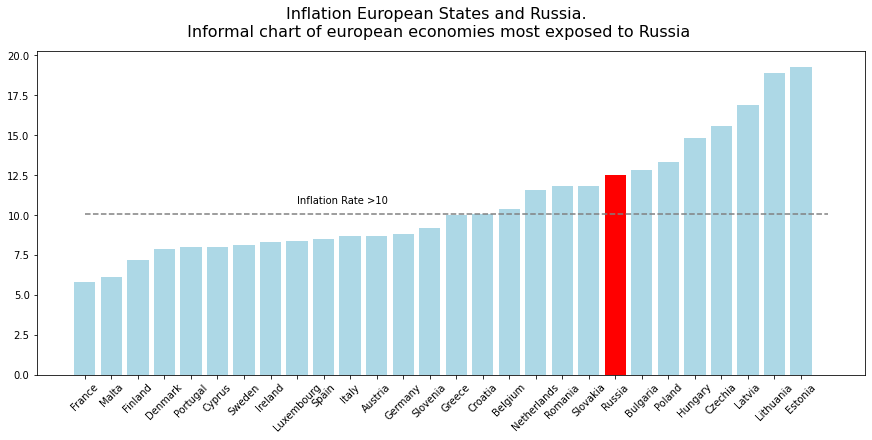

In [53]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

ax.bar(viz['country'], viz['2022'], color=['r' if v == 'Russia' else 'lightblue' for v in viz['country']] )

ax.hlines(y=10.1, xmin=0, 
          xmax=len(viz['country']),linestyle='dashed', alpha=1, color = 'gray')
ax.text(x=8, y=10, s='Inflation Rate >10\n', color='black')

ax.set_xticklabels(viz['country'],  rotation=45)

fig.suptitle('Inflation European States and Russia.\n Informal chart of european economies most exposed to Russia', fontsize=16)

plt.savefig('/content/drive/MyDrive/movie_russia/November_2022/inflation_2022.jpg')

In [54]:
ru_gdp = central_bank_table.iloc[1:2, 1:-2]

ru_gdp['2022'] = ru_gdp['2022'].str.replace(',','.').str.replace('\(', '').str.replace('\)', '')
ru_gdp[['GDP 2022 expected (lower)', 'GDP 2022 expected (upper)']] = ru_gdp['2022'].str.split('—', expand=True)

ru_gdp['2023'] = ru_gdp['2023'].str.replace(',','.').str.replace('\(', '').str.replace('\)', '')
ru_gdp[['GDP 2023 expected (lower)', 'GDP 2023 expected (upper)']] =ru_gdp['2023'].str.split('—', expand=True)

<ipython-input-54-8d1a8d9db50e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  ru_gdp['2022'] = ru_gdp['2022'].str.replace(',','.').str.replace('\(', '').str.replace('\)', '')
<ipython-input-54-8d1a8d9db50e>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  ru_gdp['2023'] = ru_gdp['2023'].str.replace(',','.').str.replace('\(', '').str.replace('\)', '')


In [55]:
ru_gdp_clenish = ru_gdp.iloc[:, 5:].rename(columns={'description EN':'Russia'}).set_index('Russia')


In [56]:
ru_gdp_clenish_save = ru_gdp_clenish.T
ru_gdp_clenish_save.to_csv('/content/drive/MyDrive/movie_russia/November_2022/russia_gdp_only.csv', index=False)

In [57]:
display(ru_gdp_clenish.T)

Russia,Gross domestic product
GDP 2022 expected (lower),-3.5
GDP 2022 expected (upper),-3.0
GDP 2023 expected (lower),-4.0
GDP 2023 expected (upper),-1.0


In [58]:
gdp_eu_st_add_ru = gdp_eu_st.copy()

In [59]:
gdp_eu_st_add_ru

country,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Luxembourg,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden
2021,4.6,6.1,7.6,13.1,6.6,3.5,4.9,8.0,3.0,6.8,...,5.1,10.3,4.9,6.8,5.5,5.1,3.0,8.2,5.5,5.1
2022,4.6,2.8,3.1,6.0,5.6,2.5,3.0,-0.1,2.3,2.6,...,1.5,5.7,4.6,4.0,6.6,5.8,1.9,6.2,4.5,2.9
2023,0.3,0.2,1.1,1.0,1.0,0.1,0.0,0.7,0.2,0.4,...,1.0,2.8,0.6,0.7,0.7,1.8,0.5,0.8,1.0,-0.6
2024,1.1,1.5,2.4,1.7,1.9,1.8,1.3,2.1,1.4,1.5,...,2.4,3.7,1.3,2.6,1.7,2.2,1.9,1.7,2.0,0.8


In [60]:
ru_gdp

,2021 (fact),2022,2023,2024,2025,description EN,GDP 2022 expected (lower),GDP 2022 expected (upper),GDP 2023 expected (lower),GDP 2023 expected (upper)
2,4.7,-3.5 — -3.0,-4.0 — -1.0,"1,5 — 2,5","1,5 — 2,5",Gross domestic product,-3.5,-3.0,-4.0,-1.0


In [61]:
# Manual calc mean of the estimates for graphing only
fact_2021 = 4.7
mean_2022 =(-3.5+ -3.0)/2
mean_2023 =(-4 + -1)/2
mean_2024 =(1.5 + 2.5)/2


In [62]:
gdp_eu_st_add_ru['Russia']=[fact_2021, mean_2022, mean_2023,mean_2024 ]

In [63]:
gdp_eu_st_add_ru

country,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,Russia
2021,4.6,6.1,7.6,13.1,6.6,3.5,4.9,8.0,3.0,6.8,...,10.3,4.9,6.8,5.5,5.1,3.0,8.2,5.5,5.1,4.70
2022,4.6,2.8,3.1,6.0,5.6,2.5,3.0,-0.1,2.3,2.6,...,5.7,4.6,4.0,6.6,5.8,1.9,6.2,4.5,2.9,-3.25
2023,0.3,0.2,1.1,1.0,1.0,0.1,0.0,0.7,0.2,0.4,...,2.8,0.6,0.7,0.7,1.8,0.5,0.8,1.0,-0.6,-2.50
2024,1.1,1.5,2.4,1.7,1.9,1.8,1.3,2.1,1.4,1.5,...,3.7,1.3,2.6,1.7,2.2,1.9,1.7,2.0,0.8,2.00


In [64]:
# gdp_eu_st_OR = gdp_eu_st.T
# above10_infl = eu_infl_2022.T
# above10_infl = above10_infl[above10_infl['2022']>10]
# above10_infl.drop(['2022'], axis=1, inplace=True)
# above10_infl_gdp = above10_infl.join(gdp_eu_st_OR).dropna().T


# below10_infl_gdp = gdp_eu_st_OR.loc[~gdp_eu_st_OR.index.isin(above10_infl.index)]
# below10_infl_gdp.T

In [65]:
viz_gdp = gdp_eu_st_add_ru.T.sort_values(by ='2022').reset_index()

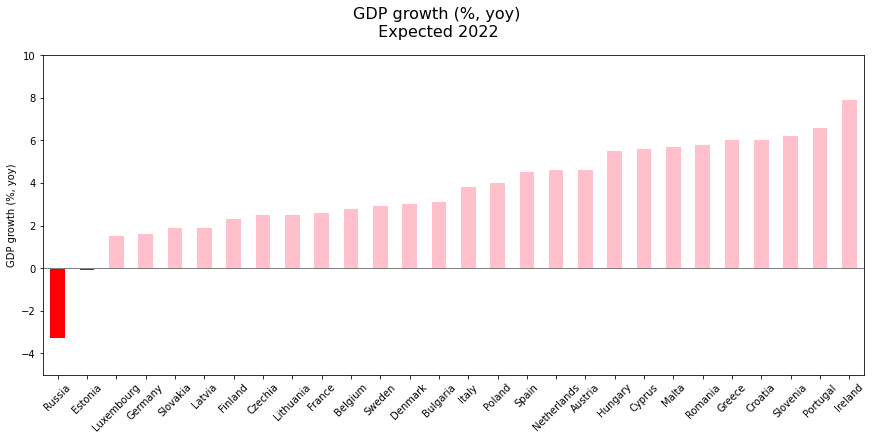

In [66]:

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

plt.ylim(-5,10)


viz_gdp['positive']= viz_gdp['2022'] > 0

p1= viz_gdp['2022'].plot(kind='bar', color=viz_gdp.positive.map({True: 'pink', False: 'r'}))

ax.set_xticklabels(viz_gdp['country'], rotation=45)


ax.axhline(0, color='grey', linewidth=1)
ax.set_ylabel('GDP growth (%, yoy)')


fig.suptitle('GDP growth (%, yoy)\n Expected 2022', fontsize=16)

plt.savefig('/content/drive/MyDrive/movie_russia/November_2022/gdp_2022.jpg')

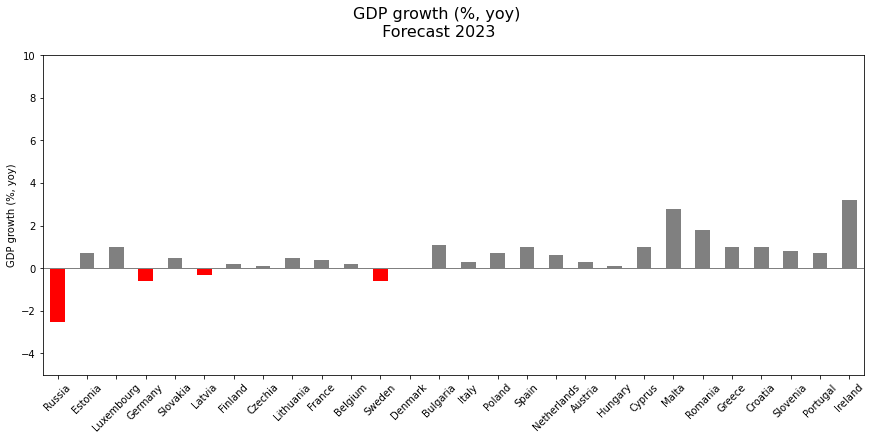

In [67]:
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

plt.ylim(-5,10)


viz_gdp['positive23']= viz_gdp['2023'] > 0

viz_gdp['2023'].plot(kind='bar',
                             color=viz_gdp.positive23.map({True: 'gray', False: 'r'}))

ax.set_xticklabels(viz_gdp['country'], rotation=45)


ax.axhline(0, color='grey', linewidth=1)
ax.set_ylabel('GDP growth (%, yoy)')

fig.suptitle('GDP growth (%, yoy)\n Forecast 2023', fontsize=16)
plt.savefig('/content/drive/MyDrive/movie_russia/November_2022/gdp_unsorted2023.jpg')

In [68]:
import pandas as pd

yarly_total_flag=pd.read_csv('/content/drive/MyDrive/movie_russia/November_2022/inflation_data_flags.csv')
yarly_total_flag.head()

,geo\TIME_PERIOD,2021,2022,2023,2024,latitude,longitude,name,flags
0,AT,2.8,8.7,6.7,3.3,47.516231,14.550072,Austria,🇦🇹
1,BE,3.2,10.4,6.2,3.3,50.503887,4.469936,Belgium,🇧🇪
2,BG,2.8,12.8,7.4,3.2,42.733883,25.485830,Bulgaria,🇧🇬
3,HR,2.7,10.1,6.5,2.3,45.100000,15.200000,Croatia,🇭🇷
4,CY,2.3,8.0,4.2,2.5,35.126413,33.429859,Cyprus,🇨🇾


In [69]:
above10_inflation = yarly_total_flag[yarly_total_flag['2022']>10]
above10_inflation=above10_inflation[['name', 'flags', '2022']]
above10_inflation.head()

,name,flags,2022
1,Belgium,🇧🇪,10.4
2,Bulgaria,🇧🇬,12.8
3,Croatia,🇭🇷,10.1
5,Czech Republic,🇨🇿,15.6
7,Estonia,🇪🇪,19.3


In [70]:
below10_infaltion = yarly_total_flag[yarly_total_flag['2022']<=10]
below10_infaltion=below10_infaltion[['name', 'flags', '2022']]
below10_infaltion.head()

,name,flags,2022
0,Austria,🇦🇹,8.7
4,Cyprus,🇨🇾,8.0
6,Denmark,🇩🇰,7.9
8,Finland,🇫🇮,7.2
9,France,🇫🇷,5.8


In [73]:
above10_inflation.sort_values(by='2022').head(3)

,name,flags,2022
3,Croatia,🇭🇷,10.1
1,Belgium,🇧🇪,10.4
19,Netherlands,🇳🇱,11.6


In [72]:
below10_infaltion.sort_values(by='2022', ascending='False')

,name,flags,2022
9,France,🇫🇷,5.8
18,Malta,🇲🇹,6.1
8,Finland,🇫🇮,7.2
6,Denmark,🇩🇰,7.9
4,Cyprus,🇨🇾,8.0
21,Portugal,🇵🇹,8.0
26,Sweden,🇸🇪,8.1
13,Ireland,🇮🇪,8.3
17,Luxembourg,🇱🇺,8.4
25,Spain,🇪🇸,8.5
